# Wine Quality Prediction both White wine and red wine

#### Importing required Libraries 

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#### Loading and looking into data 

In [272]:
data = pd.read_csv('winequalityN.csv')

In [273]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##### Here we have list of attribites which defines the quality of the wine 

* Type - white/Red 
* fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
* volatile acidity :   Volatile acidity is the gaseous acids present in wine.
* citric acid :    It is weak organic acid, found in citrus fruits naturally.
* residual sugar :   Amount of sugar left after fermentation.
* chlorides :   Amount of salt present in wine.
* free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
* total sulfur dioxide : Amount of sulfur dioxide
* pH :   In wine pH is used for checking acidity
* density : referes to quantity
* sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
* alcohol :   Percent of alcohol present in wine.
* quality : quality of the wine rated on the scale 0-10




In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


##### we have one object type whihch is a string and remaining all attributes are numerical  

In [275]:
## Check any null values are present in the data set 

data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [276]:
## lets fill the NA values with the mean vale of that colum

for col in data.columns:
    if data[col].isnull().sum()>0:
        data[col]=data[col].fillna(data[col].mean())

data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [277]:
type_to_columns = pd.get_dummies(data['type'], dtype=np.uint8)
data.drop(['type'], axis=1, inplace=True)

In [278]:
# data['red'] = type_to_columns['red']
# data['white'] = type_to_columns['white']
# data.head()
data.insert(loc=0, column='red', value=type_to_columns['red'])
data.insert(loc=1, column='white', value=type_to_columns['white'])
data.head()

,red,white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


dataset ‘Type’ feature contains two types Red and White, where Red consider as 0 and white considers as 1.

In [279]:
## Now we’ll explore the descriptive statistical measures of the dataset.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
red,6497.0,0.246114,0.430779,0.00000,0.00000,0.00000,0.00000,1.00000
white,6497.0,0.753886,0.430779,0.00000,1.00000,1.00000,1.00000,1.00000
fixed acidity,6497.0,7.216579,1.295751,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339691,0.164548,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318722,0.145231,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.444326,4.757392,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056042,0.035031,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898


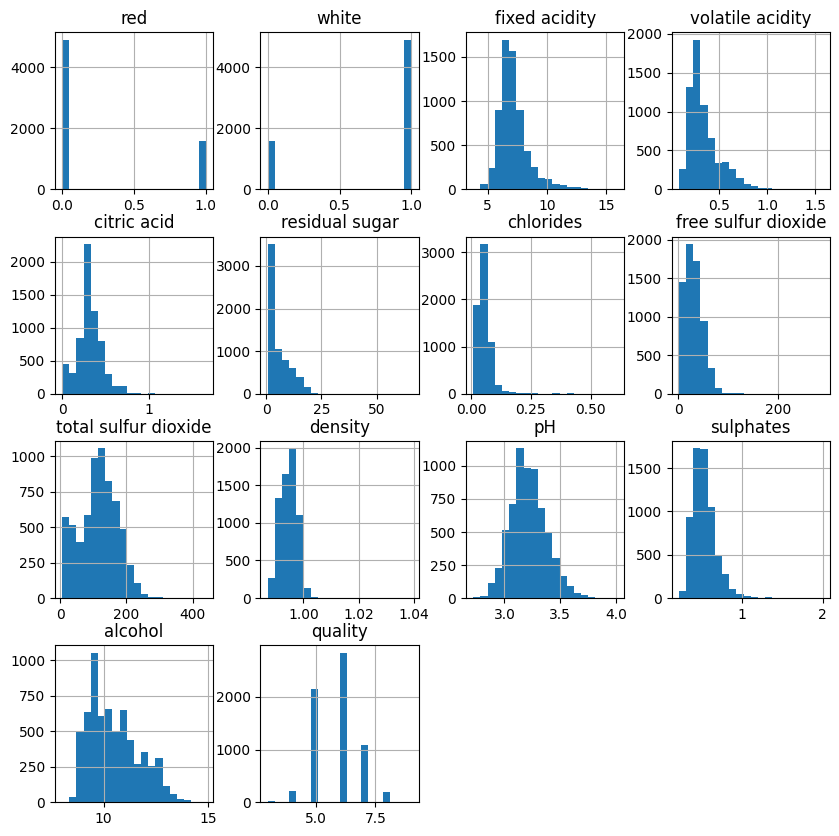

In [280]:
data.hist(bins=20, figsize=(10,10))
plt.show()

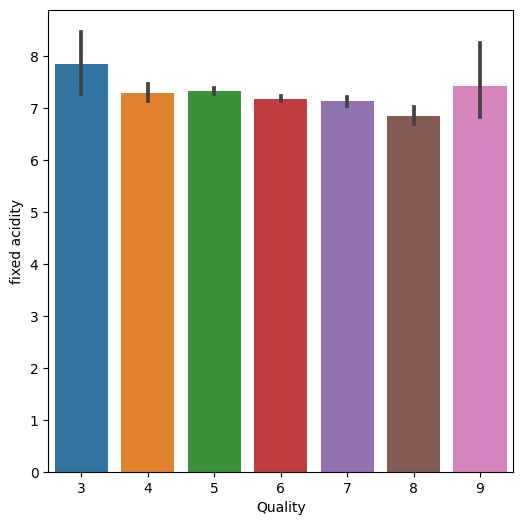

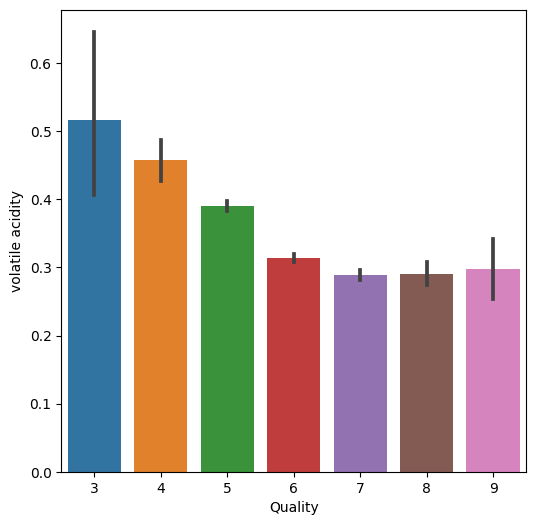

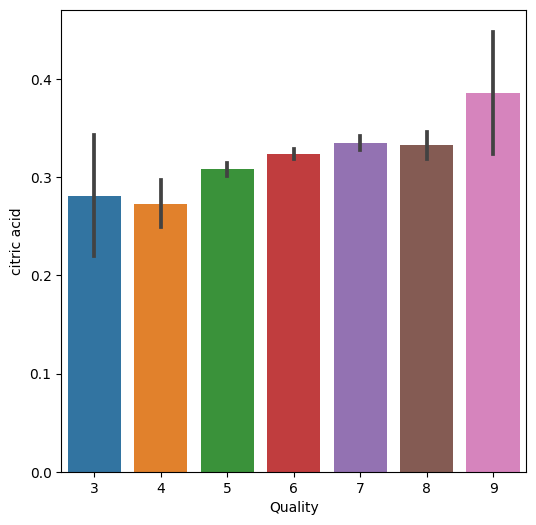

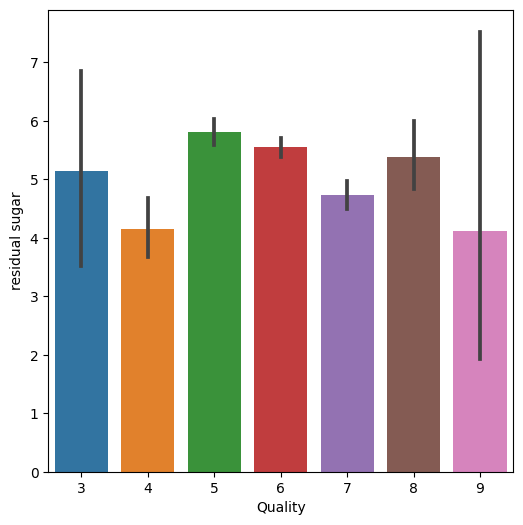

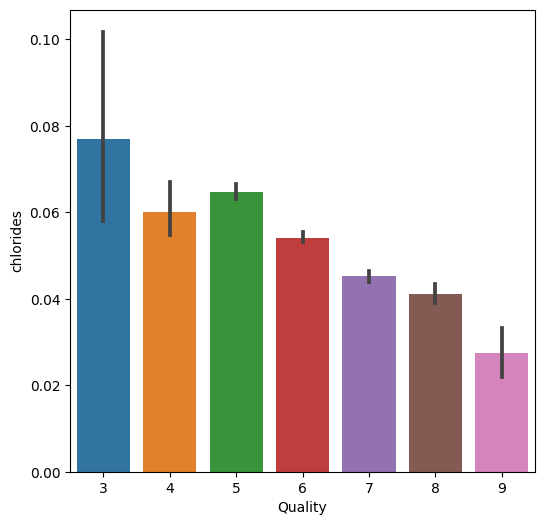

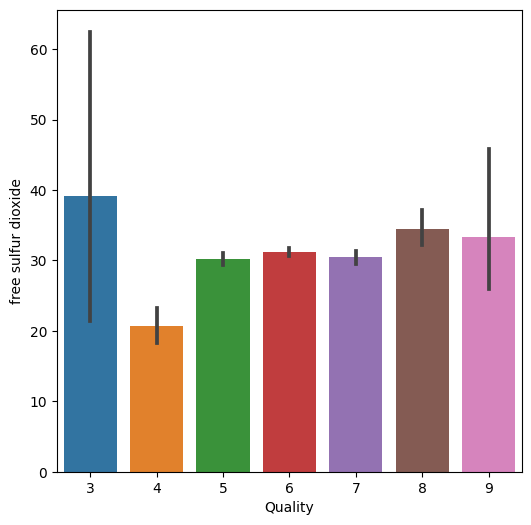

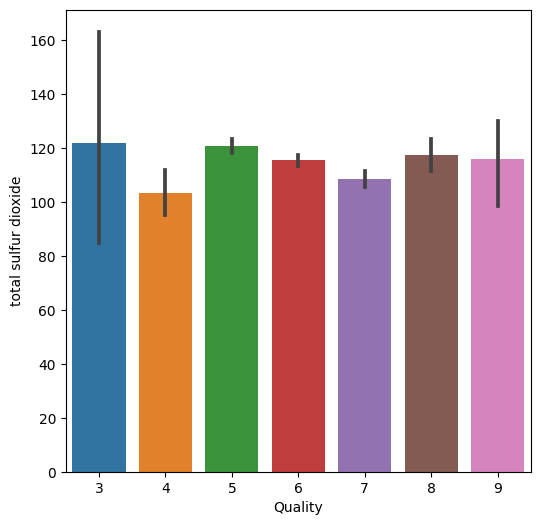

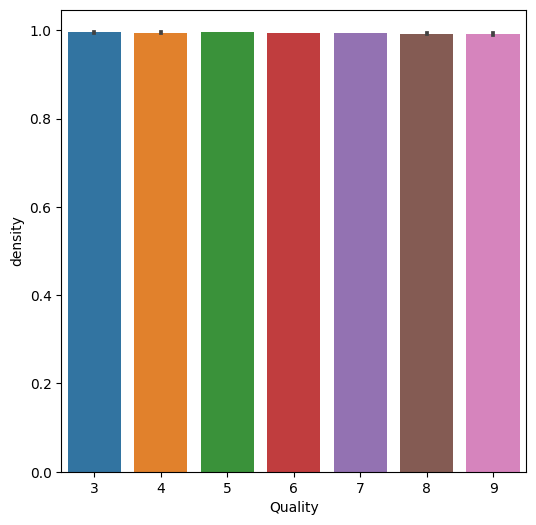

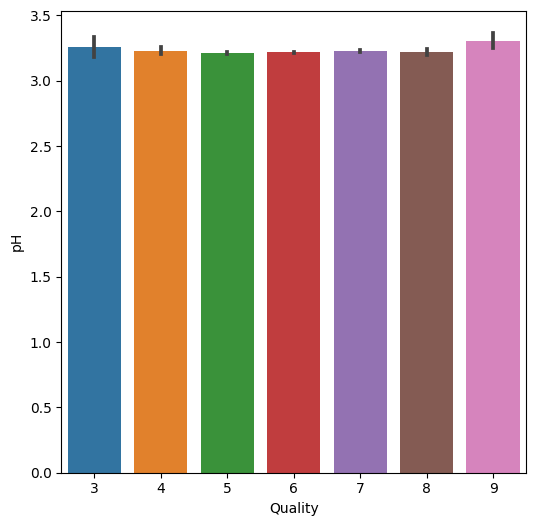

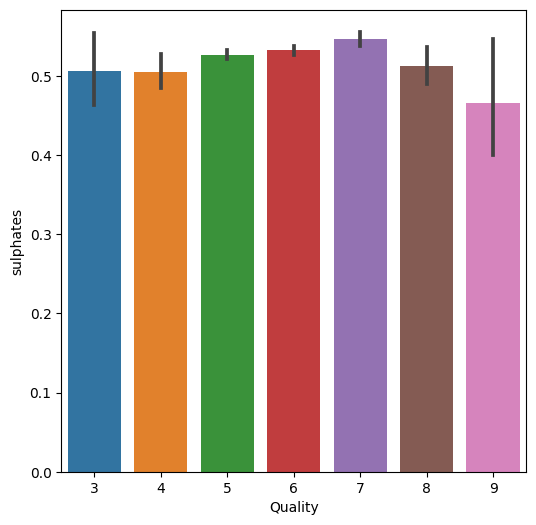

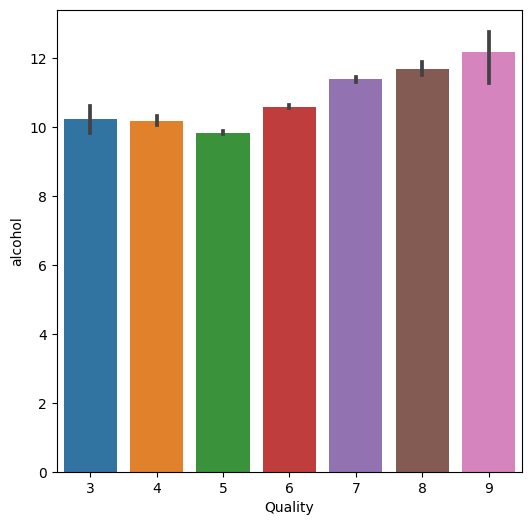

In [281]:
for col in data.columns:
    if col not in ['red','white','quality']:
        plt.figure(figsize=(6,6))
        sb.barplot(x=data['quality'], y=data[col])
        plt.xlabel("Quality")
        plt.ylabel(col)
        plt.show()

Corelation
1. positive correlation - when one attribute increases then other attribute also increasing and vice versa that means both attributes are positively correlated. That means they have a linear relationship.
2. Negative - when one attribute increases then other attribute decreases and vice versa that means both attributes are negatively correlated.
3. No Correlation: No relationship between those two attributes that means there is no pattern.


In [282]:
correlation = data.corr()

<AxesSubplot: >

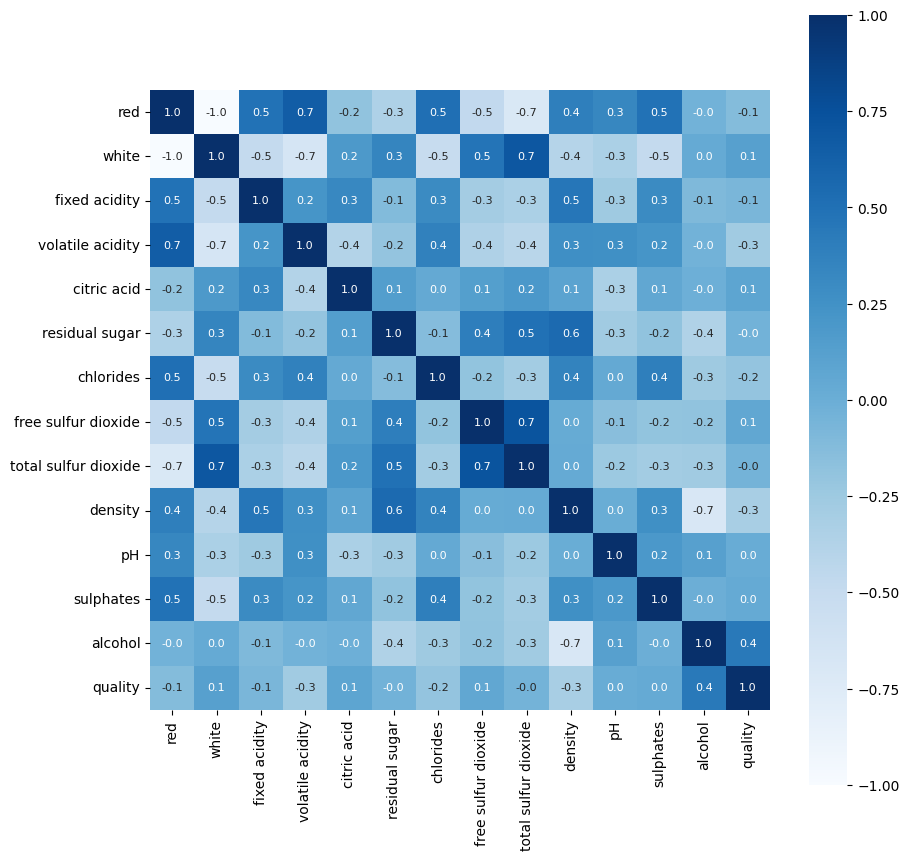

In [283]:
# costructing heat map to understand the correlation between the attributes

plt.figure(figsize=(10,10))
sb.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap = 'Blues')

let binarize the quality(target) attribute 
if quality>7 is a good quality wine for those rows we replace value with 1
elese not good we replace value with 0

In [284]:
data['quality'] = data['quality'].apply(lambda quality_value:1 if quality_value>7 else 0)
data.head()

,red,white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,0,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,0,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


split data into x and y
* x = independent data
* y = dependent /target atribute


In [285]:
X = data.iloc[: , :-1 ]
y = data.iloc[: , -1: ]
print(X, y)

      red  white  fixed acidity  volatile acidity  citric acid  \
0       0      1            7.0             0.270         0.36   
1       0      1            6.3             0.300         0.34   
2       0      1            8.1             0.280         0.40   
3       0      1            7.2             0.230         0.32   
4       0      1            7.2             0.230         0.32   
...   ...    ...            ...               ...          ...   
6492    1      0            6.2             0.600         0.08   
6493    1      0            5.9             0.550         0.10   
6494    1      0            6.3             0.510         0.13   
6495    1      0            5.9             0.645         0.12   
6496    1      0            6.0             0.310         0.47   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0               20.7      0.045                 45.0                 170.0   
1                1.6      0.049                 14.

In [286]:
# perfom split operation on the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training:

1. Random Forest Classifier

In [287]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

/var/folders/2s/zb8mlk9j3k7gzystwbcdq9hc0000gn/T/ipykernel_13439/1065324711.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

Model Evaluation

Accuracy Score

In [288]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
print(test_accuracy)

0.9815384615384616


In [289]:
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(model,open(file,'wb'))
